In [4]:
pip install prettytable

  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13698 sha256=0539b8daa1e2a0350bafca2e5ed91d1c9469652d4c27fee4675ef334aaeb6b5a
  Stored in directory: /Users/ribells/Library/Caches/pip/wheels/90/15/c3/5f28b42ae9c81638570b8b7ed654e0f98c5fdc08875869511b
Successfully built prettytable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from prettytable import PrettyTable

In [7]:
#115 years of monthly, seasonal and annual rainfall data of India
india = pd.read_csv('Gowri-data/rainfall_in_india_1901-2015.csv', sep=",")

In [8]:
india.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']


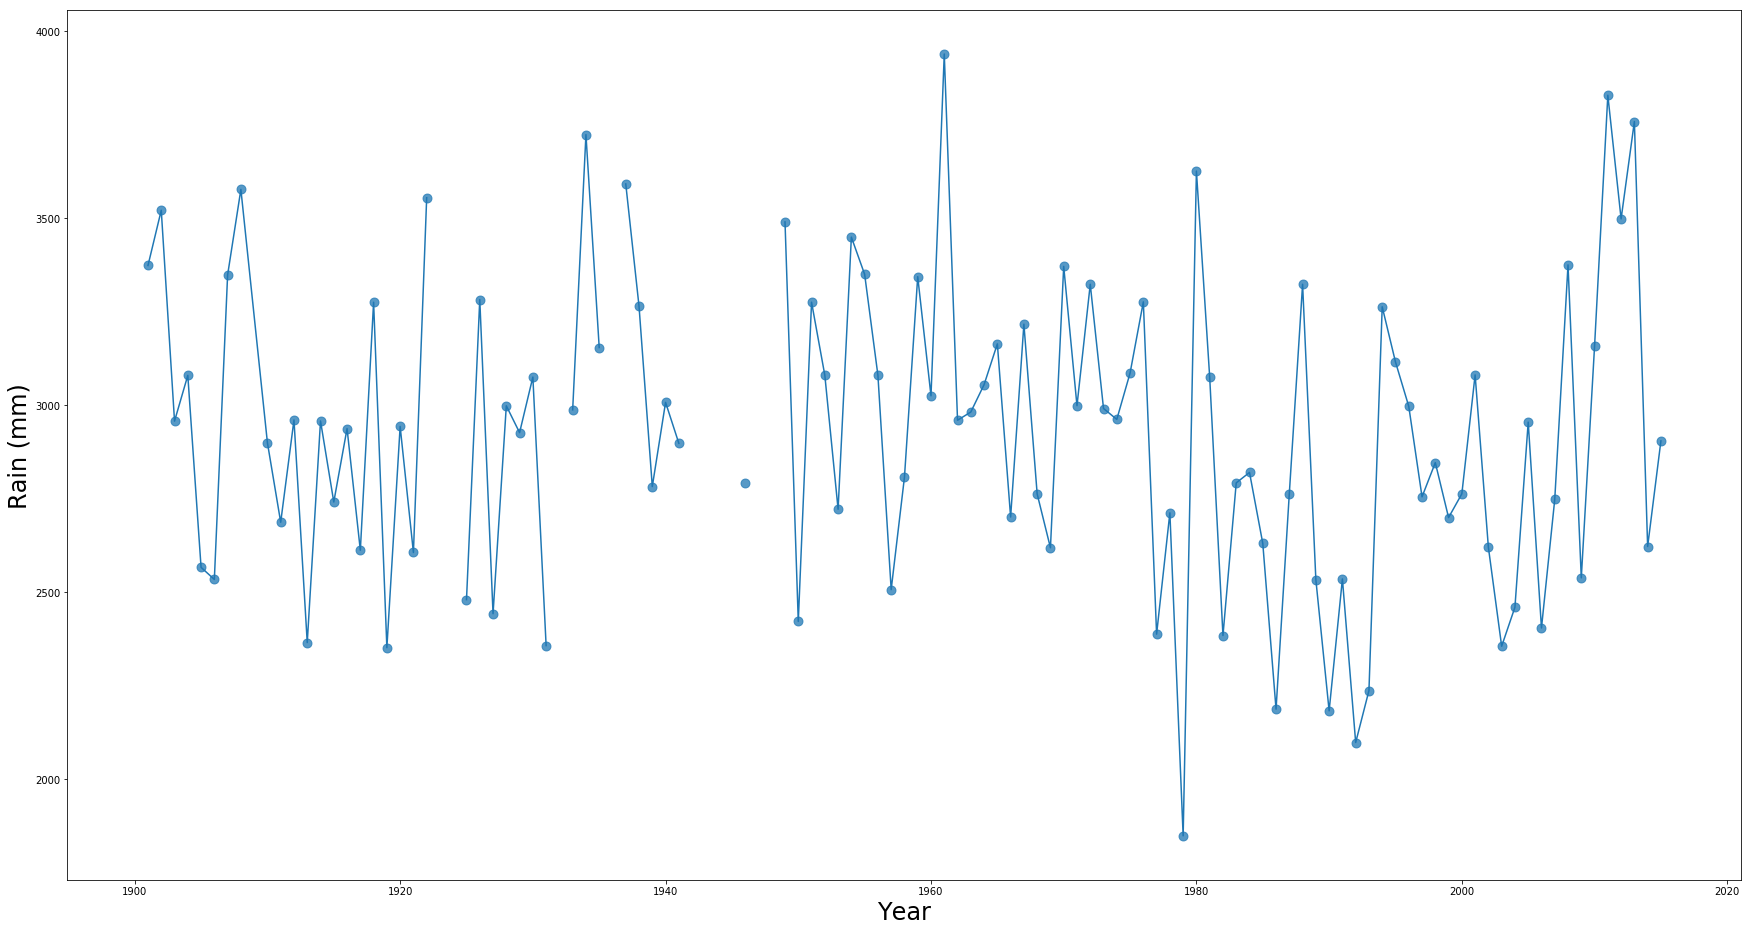

In [9]:
location = india["SUBDIVISION"]
year = india["YEAR"]
rain = india["ANNUAL"]

#filter for just one location:
anda = india[india['SUBDIVISION'] == "ANDAMAN & NICOBAR ISLANDS"]
year = anda["YEAR"]
rain = anda["ANNUAL"]

plt.figure(figsize=(30,16))

plt.plot(year, rain)
plt.scatter(year, rain, s=80, alpha=0.75)

plt.xlabel("Year", fontsize=24)
plt.ylabel("Rain (mm)", fontsize=24)


location_names = pd.Series(location, name='A').unique()
print(location_names)

#print(anda)

In [23]:
india['SUBDIVISION'] = india['SUBDIVISION'].str.replace('&','and')
india['SUBDIVISION'] = india['SUBDIVISION'].str.lower()
#india[100:130]

In [24]:
india['SUBDIVISION'].replace('assam and meghalaya',
                              'assam', inplace = True)
india['SUBDIVISION'].replace('naga mani mizo tripura',
                              'manipur', inplace = True)
india['SUBDIVISION'].replace('sub himalayan west bengal and sikkim',
                              'sikkim', inplace = True)
india['SUBDIVISION'].replace('gangetic west bengal',
                              'west bengal', inplace = True)
india['SUBDIVISION'].replace('orissa',
                              'odisha', inplace = True)
india['SUBDIVISION'].replace('east uttar pradesh',
                              'uttar pradesh', inplace = True)
india['SUBDIVISION'].replace('west uttar pradesh',
                              'uttar pradesh', inplace = True)
india['SUBDIVISION'].replace('haryana delhi and chandigarh',
                              'haryana', inplace = True)
india['SUBDIVISION'].replace('west rajasthan',
                              'rajasthan', inplace = True)
india['SUBDIVISION'].replace('east rajasthan',
                              'rajasthan', inplace = True)
india['SUBDIVISION'].replace('west madhya pradesh',
                              'madhya pradesh', inplace = True)
india['SUBDIVISION'].replace('east madhya pradesh',
                              'madhya pradesh', inplace = True)
india['SUBDIVISION'].replace('gujarat region',
                              'gujarat', inplace = True)
india['SUBDIVISION'].replace('saurashtra and kutch',
                              'maharashtra', inplace = True)
india['SUBDIVISION'].replace('konkan and goa',
                              'goa', inplace = True)
india['SUBDIVISION'].replace('madhya maharashtra',
                              'maharashtra', inplace = True)
india['SUBDIVISION'].replace('matathwada',
                              'maharashtra', inplace = True)
india['SUBDIVISION'].replace('vidarbha',
                              'maharashtra', inplace = True)
india['SUBDIVISION'].replace('coastal andhra pradesh',
                              'andhra pradesh', inplace = True)
india['SUBDIVISION'].replace('telangana',
                              'telengana', inplace = True)
india['SUBDIVISION'].replace('rayalseema',
                              'andhra pradesh', inplace = True)
india['SUBDIVISION'].replace('coastal karnataka',
                              'karnataka', inplace = True)
india['SUBDIVISION'].replace('north interior karnataka',
                              'karnataka', inplace = True)
india['SUBDIVISION'].replace('south interior karnataka',
                              'karnataka', inplace = True)
india['SUBDIVISION'].replace('vidarbha',
                              'maharashtra', inplace = True)
india['SUBDIVISION'].replace('vidarbha',
                              'maharashtra', inplace = True)

In [31]:
map_data = gpd.read_file('States/Indian_States.shp')
map_data.rename(columns = {'st_nm':'SUBDIVISION'}, inplace = True)
map_data.shape

(36, 2)

In [32]:
map_data.head(36)

,SUBDIVISION,geometry
0,Andaman & Nicobar Island,(POLYGON ((93.71975948121514 7.207067636262479...
1,Arunanchal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,..."
2,Assam,"(POLYGON ((89.74322932956994 26.3036203411059,..."
3,Bihar,(POLYGON ((84.50719832504274 24.26323103208654...
4,Chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,..."
5,Chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20656615030765 20.12215606165296,..."
7,Daman & Diu,(POLYGON ((72.89334544683499 20.44538762783679...
8,Goa,(POLYGON ((74.11917887850251 14.75344075069012...
9,Gujarat,(POLYGON ((71.70375251096965 20.99958229049037...


In [34]:
print(map_data['SUBDIVISION'])

0     Andaman & Nicobar Island
1           Arunanchal Pradesh
2                        Assam
3                        Bihar
4                   Chandigarh
5                 Chhattisgarh
6       Dadara & Nagar Havelli
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                   Meghalaya
21                     Mizoram
22                    Nagaland
23                NCT of Delhi
24                  Puducherry
25                      Punjab
26                   Rajasthan
27                      Sikkim
28                  Tamil Nadu
29                   Telangana
30                     Tripura
31               Uttar Pradesh
32      

In [35]:
map_data['SUBDIVISION'] = map_data['SUBDIVISION'].str.replace('&','and')
map_data['SUBDIVISION'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['SUBDIVISION'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['SUBDIVISION'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['SUBDIVISION'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)

In [36]:
map_data['SUBDIVISION'] = map_data['SUBDIVISION'].str.lower()

In [37]:
map_data.head()

,SUBDIVISION,geometry
0,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...
1,arunachal pradesh,"POLYGON ((96.16260946675357 29.38078474502004,..."
2,assam,"(POLYGON ((89.74322932956994 26.3036203411059,..."
3,bihar,(POLYGON ((84.50719832504274 24.26323103208654...
4,chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,..."


In [38]:
merged_data = pd.merge(map_data, india, 
                       how = 'left', on = 'SUBDIVISION')
merged_data.fillna(0, inplace = True)
#merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

,SUBDIVISION,geometry,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1901.0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1902.0,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1903.0,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1904.0,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1905.0,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [40]:
#pip install descartes

Note: you may need to restart the kernel to use updated packages.


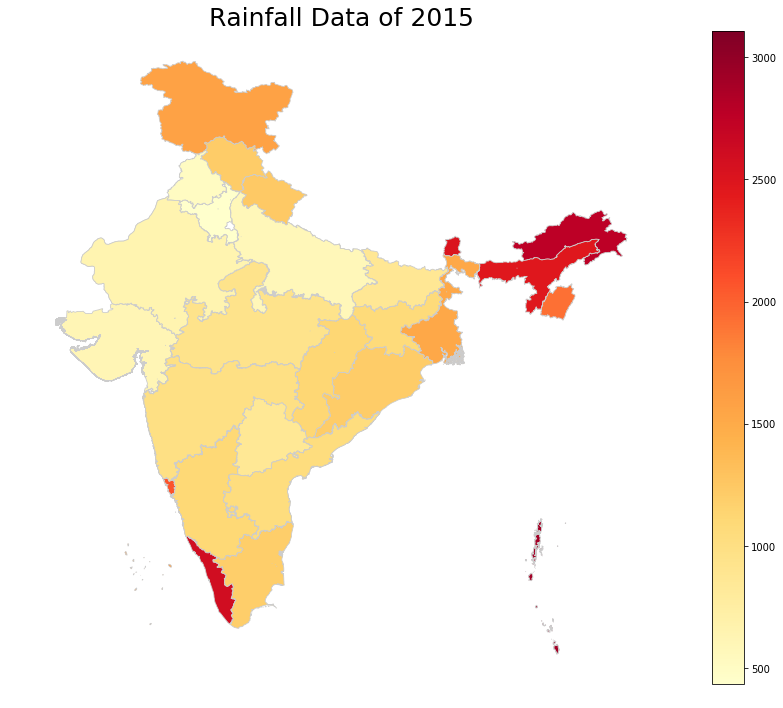

In [41]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Rainfall Data of 2015', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
year_2015 = merged_data[merged_data["YEAR"]==2015]
year_2015.plot(column = 'ANNUAL', cmap='YlOrRd', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

In [42]:
year_2015

,SUBDIVISION,geometry,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
109,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,2015.0,126.8,7.6,3.1,138.2,331.9,346.4,328.9,480.0,523.3,252.1,236.3,129.9,2904.6,134.4,473.2,1678.6,618.4
206,arunachal pradesh,"POLYGON ((96.16260946675357 29.38078474502004,...",2015.0,30.8,47.5,97.5,287.1,238.9,637.9,329.3,595.5,374.2,65.2,33.8,29.8,2767.5,78.3,623.5,1936.9,128.8
321,assam,"(POLYGON ((89.74322932956994 26.3036203411059,...",2015.0,13.4,15.5,37.5,250.9,332.5,558.5,300.1,590.9,279.9,62.6,14.0,15.2,2470.9,28.9,620.9,1729.3,91.8
436,bihar,(POLYGON ((84.50719832504274 24.26323103208654...,2015.0,12.8,1.8,27.2,38.7,39.5,122.1,231.5,287.0,101.7,10.4,0.0,0.0,872.7,14.6,105.5,742.3,10.4
552,chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,...",2015.0,15.8,1.2,21.2,37.0,13.0,257.6,248.6,286.6,216.9,17.7,0.6,1.5,1117.6,17.0,71.2,1009.7,19.7
669,goa,(POLYGON ((74.11917887850251 14.75344075069012...,2015.0,2.7,0.0,36.8,3.6,11.3,764.0,526.5,377.3,240.9,91.4,27.3,0.0,2082.0,2.7,51.7,1908.7,118.8
784,gujarat,(POLYGON ((71.70375251096965 20.99958229049037...,2015.0,1.8,0.0,6.1,5.5,0.9,120.7,354.7,37.4,93.4,2.2,0.3,0.0,622.9,1.8,12.5,606.1,2.6
899,haryana,"POLYGON ((76.85065405474091 30.87511930631098,...",2015.0,12.4,6.6,71.8,34.8,8.4,43.7,130.3,89.2,32.1,3.7,2.3,0.2,435.3,18.9,114.9,295.2,6.2
1014,himachal pradesh,"POLYGON ((76.79633817057015 33.25489599215638,...",2015.0,67.2,156.6,192.5,84.9,45.0,85.8,249.9,195.9,75.5,17.7,14.5,25.0,1210.5,223.9,322.3,607.2,57.2
1129,jammu and kashmir,"POLYGON ((74.73450654094415 37.02068299862157,...",2015.0,27.9,187.2,341.4,173.3,64.6,121.4,233.2,129.2,130.2,87.1,38.1,39.3,1572.8,215.1,579.3,614.0,164.5
